
# Seaborn vs Matplotlib


In [1]:
# an example of simple random walk in matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# create some data
rng=np.random.RandomState(0)
x=np.linspace(0,10,500)
y=np.cumsum(rng.randn(500,6),0)

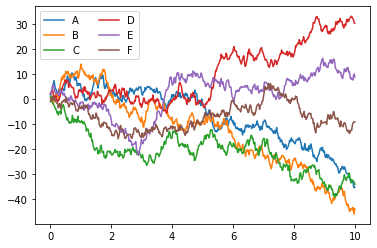

In [3]:
#plot data with default
plt.plot(x,y)
plt.legend('ABCDEF',ncol=2,loc='upper left')

In [4]:
import seaborn as sns
sns.set()

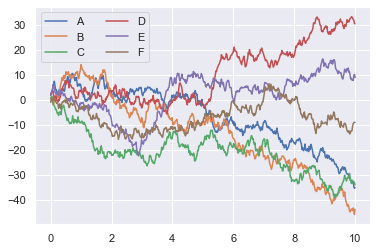

In [5]:
# same plotting code as above
plt.plot(x,y)
plt.legend('ABCDEF',ncol=2,loc='upper left')

# Exploring seaborn plots
The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

In [6]:
# Histogram ,KDE and densities
data=np.random.multivariate_normal([0,0],[[5,2],[2,2]],size=2000)
data=pd.DataFrame(data,columns=['x','y'])
data.head()

,x,y
0,2.773081,0.939441
1,-4.488979,-1.843404
2,2.399639,1.621684
3,-1.816527,0.326962
4,1.944656,2.050705


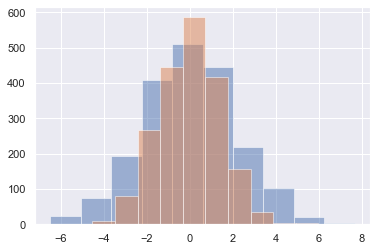

In [7]:
for col in 'xy':
    plt.hist(data[col],alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with sns.kdeplot

KDE for visualizing distributions


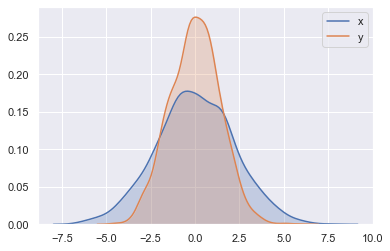

In [8]:
print('KDE for visualizing distributions')
for col in 'xy':
    sns.kdeplot(data[col],shade=True)

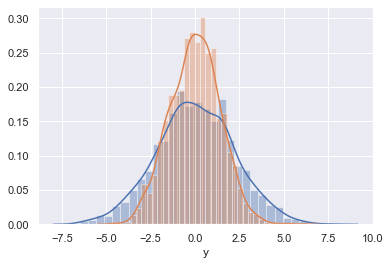

In [9]:
# Histogram and KDE are combined using displot
sns.distplot(data['x'])
sns.distplot(data['y'])

E:\Anaconda\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


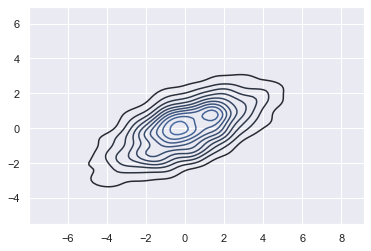

In [10]:
# pass 2D dataset to kdeplot ,get 2D visualization of data
sns.kdeplot(data)

We can see the joint distribution and the marginal distributions together using sns.jointplot. For this plot, we’ll set the style to a white backgroun

a joint distribution with a 2D KDE


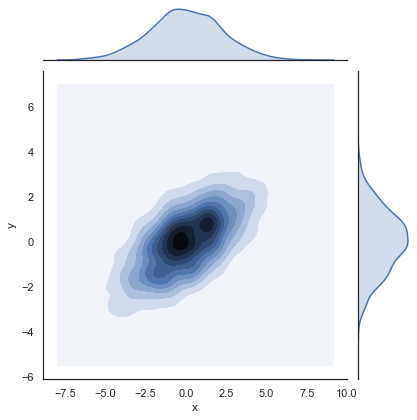

In [11]:
print('a joint distribution with a 2D KDE')
with sns.axes_style('white'):
    sns.jointplot('x','y',data,kind='kde')

There are other parameters that can be passed to jointplot—for example, we can use a hexagonally based histogram instead

a joint distribution with a hexagonal bin representation


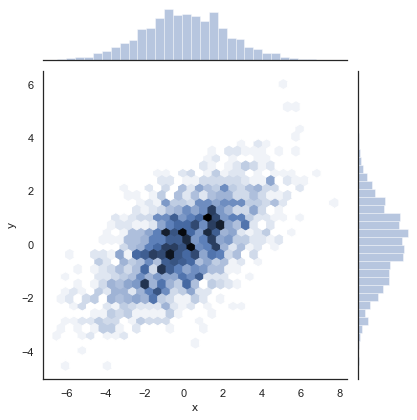

In [12]:
print('a joint distribution with a hexagonal bin representation')
with sns.axes_style('white'):
    sns.jointplot('x','y',data,kind='hex')

# pair plot
When you generalize joint plots to datasets of larger dimensions, you end up with pair plots. This is very useful for exploring correlations between multidimensional data, when you’d like to plot all pairs of values against each other. We’ll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris specie

In [54]:
# visualizing multidimentional relationship among samples sns.pairplot()
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


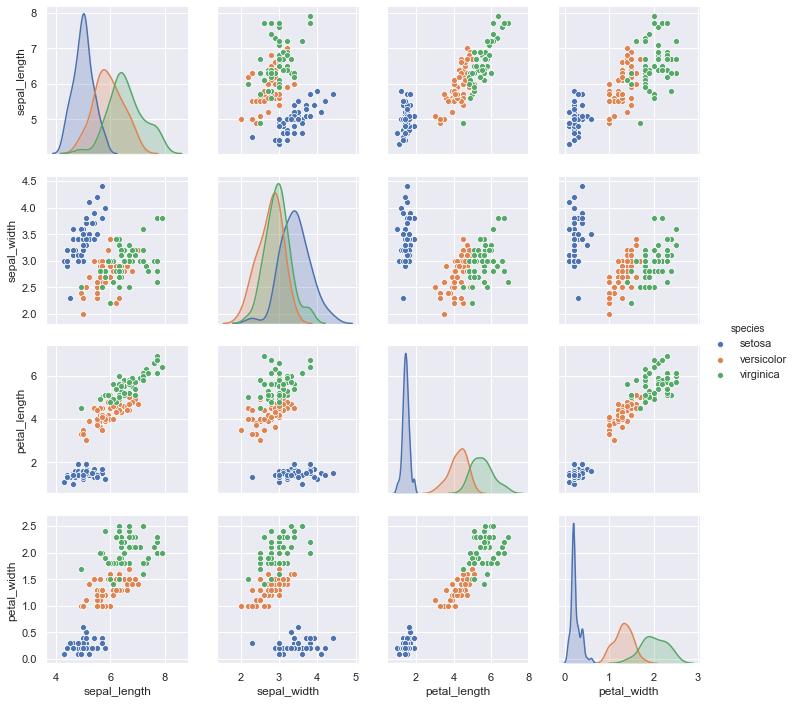

In [56]:
sns.pairplot(iris,hue='species',size=2.5)

## Faceted histogram
Sometimes the best way to view data is via histograms of subsets. Seaborn’s <b>FacetGrid</b> makes this extremely simple. We’ll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data

In [55]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [60]:
tips['tip_pct']=100 * tips['tip'] /tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


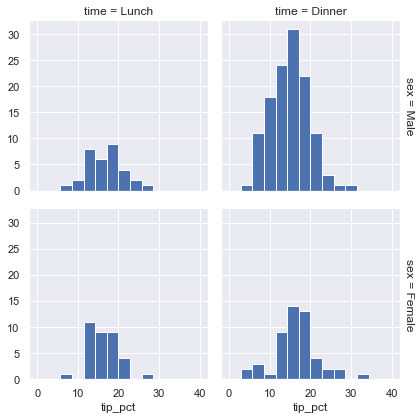

In [65]:
grid=sns.FacetGrid(tips,row='sex',col='time',margin_titles=True)
grid.map(plt.hist,'tip_pct',bins=np.linspace(0,40,15))

## Factor plots
Factor plots can be useful for this kind of visualization as well. This allows you to view the distribution of a parameter within bins defined by any other parameter

E:\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


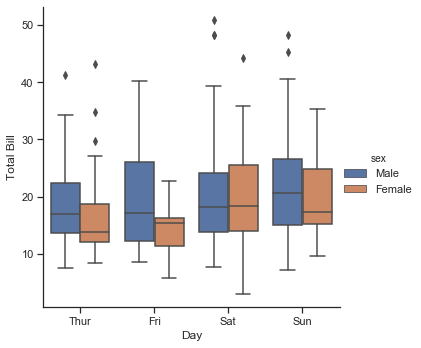

In [67]:
with sns.axes_style(style='ticks'):
    g=sns.factorplot('day','total_bill','sex',data=tips,kind='box')
    g.set_axis_labels('Day','Total Bill')

## Joint Distributions
Similar to the pair plot we saw earlier, we can use sns.jointplot to show the joint distribution between different datasets, along with the associated marginal distributions 

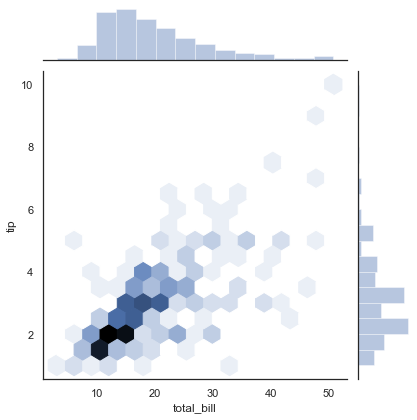

In [68]:
with sns.axes_style('white'):
    sns.jointplot('total_bill','tip',data=tips,kind='hex')

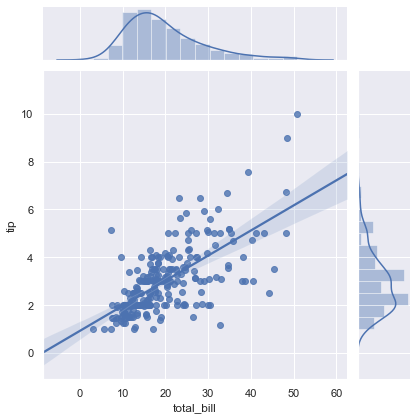

In [71]:
# joint plot can even automatic KDE and regression
sns.jointplot('total_bill','tip',data=tips,kind='reg')

## Bar plot


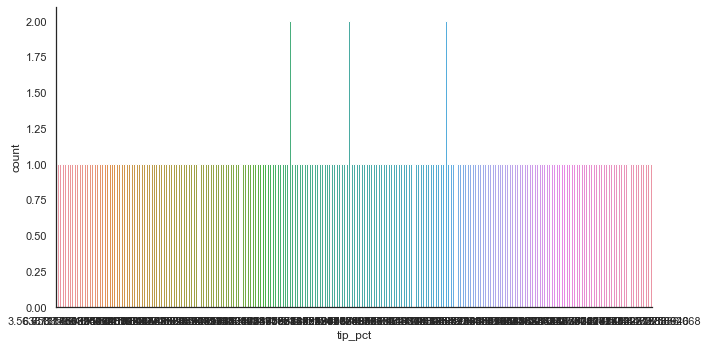

In [74]:
with sns.axes_style('white'):
    g=sns.factorplot('tip_pct',data=tips,aspect=2,kind='count')
    g.set_xticklabels(step=5)